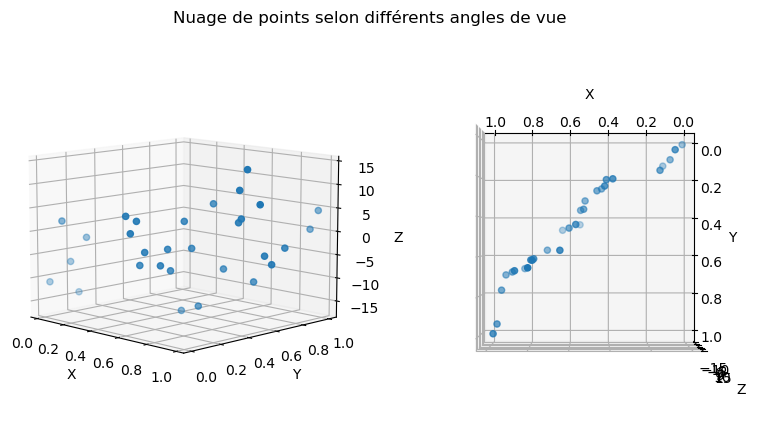

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as alg 
from scipy.linalg import svd, sqrtm

np.random.seed(0)

def f(X,Y):
    return 3*(X+Y)-2

X = np.sort(np.random.rand(30))
Y = np.sort(np.random.rand(30))
Z = f(X,Y) + np.random.randn(30) * 10


fig = plt.figure(figsize=plt.figaspect(0.5))

ax = fig.add_subplot(1,2,1, projection='3d')

ax.scatter(X, Y,Z, zdir='z')
ax.view_init(elev=10, azim=-45, roll=0)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax = fig.add_subplot(1,2,2, projection='3d')


ax.scatter(X,Y,Z, zdir='z')
ax.view_init(elev=90, azim=90, roll=0)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
fig.suptitle('Nuage de points selon différents angles de vue')
plt.show()




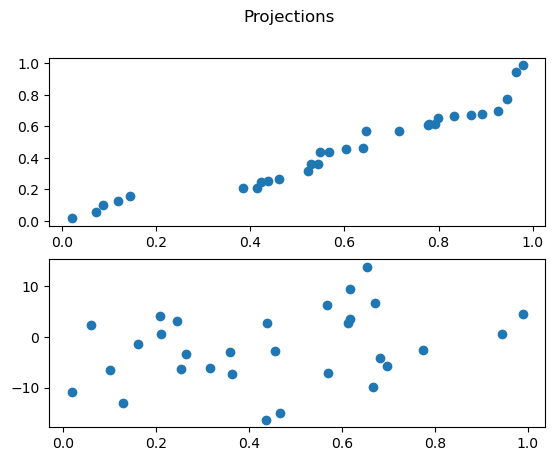

In [74]:
fig, ax = plt.subplots(2)
fig.suptitle('Projections')
ax[0].scatter(X,Y)
ax[1].scatter(Y,Z)

plt.show()

In [96]:
def ACP(X, dim, norm = True):
    n,p = np.shape(X)
    if norm:
        mean = np.mean(X, axis=0)
        var = np.sqrt(sum((X-mean)**2)/n)
        X=(X-mean)/var
    else :
        mean = np.mean(X, axis=0)
        X-=mean
    C = (1/n)*np.dot(X.T,X)
    u, s, v = alg.svd(C)
    
    if norm :
        var_expl = s/p
    else :
        var_expl =s/np.sum(s)
        
    # v représente les composantes principales, s leurs valeurs propres associées, et var_expl les pourcentages de variance expliquée
    return v[:dim], s[:dim], var_expl[:dim]      


In [127]:
donnees = np.array([[X[i],Y[i],Z[i]] for i in range(30)])

components, vp, var = ACP(donnees,2)
print(components, vp, var)

[[-0.65956497 -0.66118027 -0.35751181]
 [ 0.25832844  0.24726627 -0.93387676]] [2.12664308 0.83495004] [0.70888103 0.27831668]


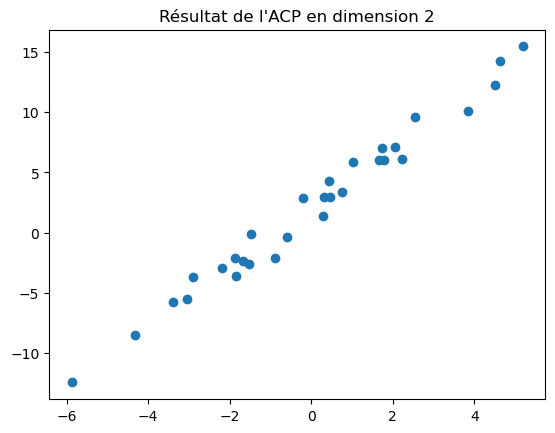

In [137]:
plt.title("Résultat de l'ACP en dimension 2")
plt.scatter(components[0][0]*X+components[0][1]*Y+components[0][2]*Z,components[1][0]*X+components[1][1]*Y+components[1][2]*Z)
plt.show()


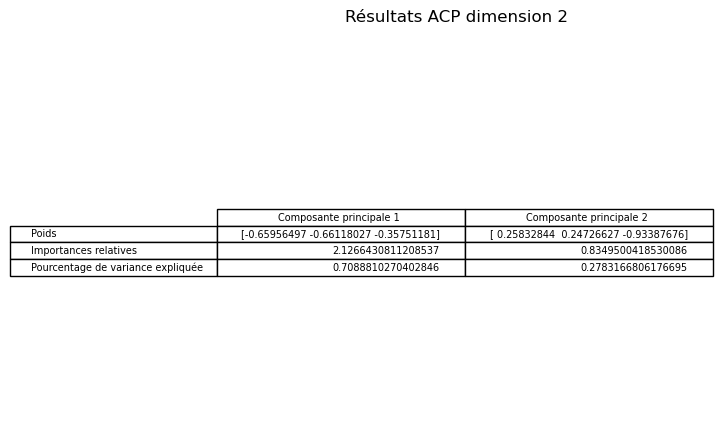

In [147]:
fig, ax =plt.subplots(1,1)
fig.suptitle("Résultats ACP dimension 2")
row_labels=["Poids","Importances relatives","Pourcentage de variance expliquée"]
column_labels = ["Composante principale 1 ", "Composante principale 2 "]
ax.axis('tight')
ax.axis('off')
ax.table(cellText=[components,vp,var],colLabels=column_labels,rowLabels=row_labels,loc="center")
plt.show()

In [150]:
def ACP01(X, dim, norm = True):
    n,p = np.shape(X)
    if norm:
        mean = np.mean(X, axis=0)
        var = np.sqrt(sum((X-mean)**2)/n)
        X=(X-mean)/var
    else :
        mean = np.mean(X, axis=0)
        X-=mean
    C = (1/n)*np.dot(X.T,X)
    u, s, v = alg.svd(C)
    
    if norm :
        var_expl = s/p
    else :
        var_expl =s/np.sum(s)
    for i in range(p):
        for j in range(p):
            liste = [np.abs(v[i][j]), np.abs(1-v[i][j]), np.abs(-1-v[i][j])]
            v[i][j]= liste.index(min(liste))-1
    return v[:dim]    

In [163]:
components01=ACP01(donnees,2)
print(components01)

[[ 1.  1. -1.]
 [-1. -1.  1.]]


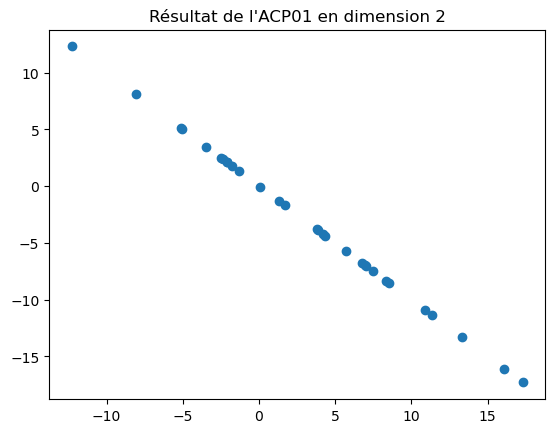

In [156]:
plt.title("Résultat de l'ACP01 en dimension 2")
plt.scatter(components01[0][0]*X+components01[0][1]*Y+components01[0][2]*Z,components01[1][0]*X+components01[1][1]*Y+components01[1][2]*Z)
plt.show()

In [172]:
def ACP_tresh(X, dim, norm = True):
    n,p = np.shape(X)
    if norm:
        mean = np.mean(X, axis=0)
        var = np.sqrt(sum((X-mean)**2)/n)
        X=(X-mean)/var
    else :
        mean = np.mean(X, axis=0)
        X-=mean
    C = (1/n)*np.dot(X.T,X)
    u, s, v = alg.svd(C)
    
    if norm :
        var_expl = s/p
    else :
        var_expl =s/np.sum(s)
    for i in range(p):
        for j in range(p):
            v[i][j]*= (np.abs(v[i][j])>0.3)
    return v[:dim]    

In [173]:
components_t=ACP_tresh(donnees,2)
print(components_t)

[[-0.65956497 -0.66118027 -0.35751181]
 [ 0.          0.         -0.93387676]]


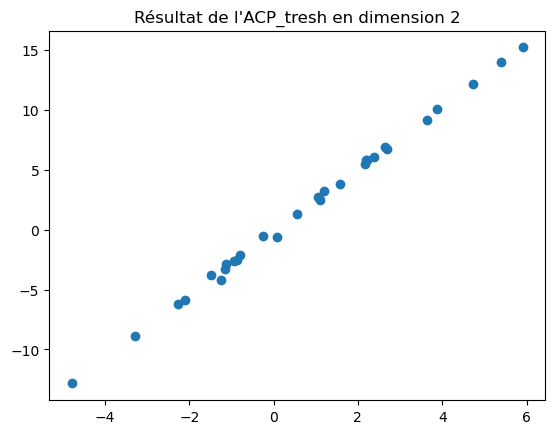

In [175]:
plt.title("Résultat de l'ACP_tresh en dimension 2")
plt.scatter(components_t[0][0]*X+components01[0][1]*Y+components_t[0][2]*Z,components_t[1][0]*X+components_t[1][1]*Y+components_t[1][2]*Z)
plt.show()